<a href="https://colab.research.google.com/github/kencbaron/BEAM-Data-Science-Fall-2019/blob/master/Lesson7plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Continuation - Linear Regression</h1>

<h2>Key Concepts</h2>

- Fit a linear model
- Goodness of fit of a regression model and R-squared
- Multiple regression 


<h2> Shout Outs to Colleagues </h2>

Walt H (538), Harold F and Peter T. And Aditi K, Greg S, Jinger Z, Steven K, and Xufei W



<h2>Loading Statistics Packages </h2>

As usual, we load some helpful Python statistics packages:

- Pandas is a general purpose package for data analysis, particularly datasets that are measured over time (*pan*el *da*taset*s*)
- Numpy is a package for easily manipulating matrices and includes some basic multivariate statistics and linear algebra functions
- Matplotlib is a package for plotting data


In [0]:
import pandas as pd # loading Pandas, a module for data analysis
import numpy as np # loading Numpy, a module for matrices and linear algebra
import matplotlib.pyplot as plt # loading matplotlib.pyplot, a module useful for interactiveplotting
import warnings; warnings.simplefilter('ignore')  # suppressing warnings 

In [2]:
!git clone https://@github.com/kencbaron/data # cloning an existing github repository

Cloning into 'data'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 4862 (delta 13), reused 15 (delta 5), pack-reused 4824
Receiving objects: 100% (4862/4862), 82.45 MiB | 19.97 MiB/s, done.
Resolving deltas: 100% (2339/2339), done.
Checking out files: 100% (788/788), done.


In [0]:
data = pd.read_csv("data/candy-power-ranking/candy-data.csv") # reading our csv dataset into the variable name data # using Pandas to load data


In [4]:
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


Reminder that Python indexing starts at 0

<h2> Computing Some Correlations </h2>

In [5]:
np.corrcoef([data["winpercent"],data["chocolate"]])

array([[1.        , 0.63651675],
       [0.63651675, 1.        ]])

In [6]:
np.corrcoef([data["winpercent"],data["caramel"]])

array([[1.       , 0.2134163],
       [0.2134163, 1.       ]])

In [7]:
import statsmodels.api as sm # import a stats module 
data["Constant"] = 1
data["Constant"]

0     1
1     1
2     1
3     1
4     1
     ..
80    1
81    1
82    1
83    1
84    1
Name: Constant, Length: 85, dtype: int64

Computing A Simple Linear Regression

In [8]:
m = sm.OLS(data["winpercent"], data[["chocolate", "Constant"]]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     56.53
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           5.86e-11
Time:                        12:59:11   Log-Likelihood:                -326.58
No. Observations:                  85   AIC:                             657.2
Df Residuals:                      83   BIC:                             662.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
chocolate     18.7793      2.498      7.519      0.000      13.812      23.747
Constant      42.1423      1.648     25.574      0.000      38.865      45.420
==============================================================================
Omnibus:                        0.632   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.729   Jarque-Bera (JB):                0.716
Skew:                           0.011   Prob(JB):                        0.699
Kurtosis:                       2.551   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
m = sm.OLS(data["winpercent"], data[["caramel", "Constant"]]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.961
Date:                Sat, 14 Dec 2019   Prob (F-statistic):             0.0499
Time:                        12:59:21   Log-Likelihood:                -346.68
No. Observations:                  85   AIC:                             697.4
Df Residuals:                      83   BIC:                             702.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
caramel        8.4164      4.229      1.990      0.050       0.005      16.828
Constant      48.9305      1.716     28.510      0.000      45.517      52.344
==============================================================================
Omnibus:                        1.828   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.785
Skew:                           0.275   Prob(JB):                        0.410
Kurtosis:                       2.552   Cond. No.                         2.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
np.corrcoef([data["winpercent"], data["chocolate"],data["fruity"], data["caramel"], data["peanutyalmondy"]])

array([[ 1.        ,  0.63651675, -0.38093814,  0.2134163 ,  0.4061922 ],
       [ 0.63651675,  1.        , -0.74172106,  0.24987535,  0.37782357],
       [-0.38093814, -0.74172106,  1.        , -0.33548538, -0.39928014],
       [ 0.2134163 ,  0.24987535, -0.33548538,  1.        ,  0.05935614],
       [ 0.4061922 ,  0.37782357, -0.39928014,  0.05935614,  1.        ]])

In [0]:
names = ['winpercent', 'chocolate', 'fruity', 'caramel', "peanutyalmondy"]

In [0]:
corr=np.corrcoef([data["winpercent"], data["chocolate"],data["fruity"], data["caramel"], data["peanutyalmondy"]])

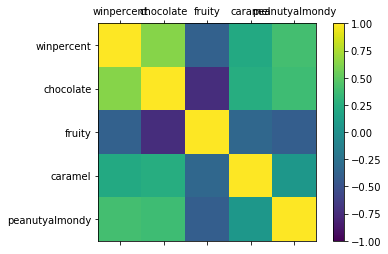

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [0]:
names = ['winpercent', 'chocolate', 'fruity', 'caramel', "peanutyalmondy"]

<h2> Computing A Linear Multiple Regression

In [14]:
m = sm.OLS(data["winpercent"], data[["chocolate", "fruity", "caramel", "peanutyalmondy", "nougat", "crispedricewafer", "hard", "bar", "pluribus", "Constant"]]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     8.842
Date:                Sat, 14 Dec 2019   Prob (F-statistic):           6.05e-09
Time:                        12:59:39   Log-Likelihood:                -317.92
No. Observations:                  85   AIC:                             655.8
Df Residuals:                      75   BIC:                             680.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
chocolate           19.9058      3.897      5.107      0.000      12.142      27.670
fruity              10.2677      3.789      2.710      0.008       2.720      17.815
caramel              3.3843      3.603      0.939      0.351      -3.794      10.563
peanutyalmondy      10.1410      3.595      2.821      0.006       2.980      17.302
nougat               2.4163      5.690      0.425      0.672      -8.918      13.751
crispedricewafer     8.9915      5.328      1.688      0.096      -1.622      19.605
hard                -4.8726      3.439     -1.417      0.161     -11.724       1.979
bar                 -0.7220      4.871     -0.148      0.883     -10.425       8.981
pluribus            -0.1599      3.012     -0.053      0.958      -6.159       5.839
Constant            35.0155      4.078      8.586      0.000      26.891      43.140
==============================================================================
Omnibus:                        1.753   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.697
Skew:                          -0.258   Prob(JB):                        0.428
Kurtosis:                       2.538   Cond. No.                         8.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While there are lots of numbers here, a few confirm what we could probably tell from linear inspection: overall, this is a good model:

- The <b>R-squared</b>, which is the squared correlation coefficient, is 51.5%, which is pretty good for a linear model.  Just how good is given by the variables. <b>F-statistic</b>, which roughly tells us how implausible it would be to see such a high correlation that we happen to have here, under the assumption that there is actually no correlation between the two.  The actual probability is given by the <b>P-value</b> of the F-statistic, which is very close to zero.  This means the probability of seeing a relationship this strong if in truth one did not exist is less than the probability that you could pick one atom out of all of the atoms in the universe.


#### **Linear Model Assumptions and Residual Analysis**



The linear model makes two critical assumptions (there are others, but these are two of the most important):

- <b>Homoskedasticity</b>: This is a fancy way of saying that the variance of the errors is the same no matter what the value of the predictor variable is.  In other words, the predicted range of Win-Percent is about as wide a country with chocolate or no chocolate.
- <b>Independence of errors</b>: This means that knowing how much the model gets Win-Percent of one candy wrong shouldn't tell us anything about how much the model gets wrong the Win-Percent of other candies.

Both of these assumptions are quite strong and **rarely hold in practice**: the goal is more to make sure they hold reasonably well.  Let's look at the residuals to see how well they hold:

In [20]:
data["Residual"] = m.resid
m.resid

0      0.396607
1     10.987397
2     -2.754373
3     11.101046
4      7.058275
        ...    
80     0.183092
81    -1.398732
82    -0.747754
83     8.377128
84   -14.228772
Length: 85, dtype: float64

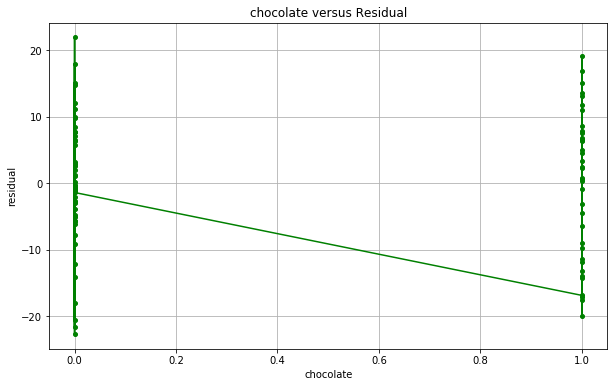

In [23]:
data.sort_values('chocolate', inplace=True)
fig = plt.figure(figsize=(10, 6))
plt.plot(data["chocolate"], data["Residual"], "go-", markersize=4)
plt.xlabel("chocolate")
plt.ylabel("residual")
plt.title("chocolate versus Residual")
plt.grid()